# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | rapid city
Processing Record 3 of Set 1 | klyuchi
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | broadstairs
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | flying fish cove
Processing Record 10 of Set 1 | les avirons
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | sao vicente
Processing Record 13 of Set 1 | baijiantan
Processing Record 14 of Set 1 | sligo
Processing Record 15 of Set 1 | bayanhongor
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | la'ie
Processing Record 18 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | akureyri
Processing 

Processing Record 40 of Set 4 | qarazhal
Processing Record 41 of Set 4 | nar'yan-mar
Processing Record 42 of Set 4 | taro
Processing Record 43 of Set 4 | thurso
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | al hawatah
Processing Record 46 of Set 4 | puerto san jose
Processing Record 47 of Set 4 | ostersund
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | carolina beach
Processing Record 0 of Set 5 | anibare
City not found. Skipping...
Processing Record 1 of Set 5 | magistral'nyy
Processing Record 2 of Set 5 | saipan
Processing Record 3 of Set 5 | manakara
Processing Record 4 of Set 5 | puerto ayora
Processing Record 5 of Set 5 | inekar
City not found. Skipping...
Processing Record 6 of Set 5 | prabumulih
Processing Record 7 of Set 5 | lebu
Processing Record 8 of Set 5 | calvi
Processing Record 9 of Set 5 | novodvinsk
Processing Record 10 of Set 5 | basco
Processing Record 11 of Set 5 | urengoy
Processing Record 12 of Set 5 | kissidoug

Processing Record 31 of Set 8 | yerseke
Processing Record 32 of Set 8 | cable beach
City not found. Skipping...
Processing Record 33 of Set 8 | fougamou
Processing Record 34 of Set 8 | enewetak
Processing Record 35 of Set 8 | palmas
Processing Record 36 of Set 8 | franceville
Processing Record 37 of Set 8 | kupang
Processing Record 38 of Set 8 | colesberg
Processing Record 39 of Set 8 | kill devil hills
Processing Record 40 of Set 8 | lae
Processing Record 41 of Set 8 | lutjenburg
Processing Record 42 of Set 8 | takahagi
Processing Record 43 of Set 8 | urzhar
Processing Record 44 of Set 8 | armacao de buzios
Processing Record 45 of Set 8 | thanh hoa
Processing Record 46 of Set 8 | sheldon
Processing Record 47 of Set 8 | funafuti
Processing Record 48 of Set 8 | tindouf
Processing Record 49 of Set 8 | nagqu
Processing Record 0 of Set 9 | ati
Processing Record 1 of Set 9 | mournies
Processing Record 2 of Set 9 | tonghae
Processing Record 3 of Set 9 | musay'id
City not found. Skipping...
P

Processing Record 21 of Set 12 | astaneh-ye ashrafiyeh
Processing Record 22 of Set 12 | asau
Processing Record 23 of Set 12 | gallivare
City not found. Skipping...
Processing Record 24 of Set 12 | lashio
Processing Record 25 of Set 12 | kokshetau
Processing Record 26 of Set 12 | zaterechnyy
Processing Record 27 of Set 12 | uige
Processing Record 28 of Set 12 | las palmas de gran canaria
Processing Record 29 of Set 12 | cividale del friuli
Processing Record 30 of Set 12 | viligili
City not found. Skipping...
Processing Record 31 of Set 12 | ivdel'
Processing Record 32 of Set 12 | pacific grove
Processing Record 33 of Set 12 | brigantine
Processing Record 34 of Set 12 | kriva palanka
Processing Record 35 of Set 12 | wuchuan
Processing Record 36 of Set 12 | remire-montjoly
Processing Record 37 of Set 12 | idri
Processing Record 38 of Set 12 | inverell
Processing Record 39 of Set 12 | el nido
Processing Record 40 of Set 12 | lethem
Processing Record 41 of Set 12 | la ferte-bernard
--------

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,6.22,76,13,2.45,AU,1689691102
1,rapid city,44.0805,-103.2310,25.61,70,0,3.09,US,1689691334
2,klyuchi,52.2667,79.1667,23.48,39,82,3.74,RU,1689691055
3,adamstown,-25.0660,-130.1015,20.95,79,89,3.31,PN,1689691023
4,hawaiian paradise park,19.5933,-154.9731,24.73,91,75,3.60,US,1689691052


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,6.22,76,13,2.45,AU,1689691102
1,rapid city,44.0805,-103.2310,25.61,70,0,3.09,US,1689691334
2,klyuchi,52.2667,79.1667,23.48,39,82,3.74,RU,1689691055
3,adamstown,-25.0660,-130.1015,20.95,79,89,3.31,PN,1689691023
4,hawaiian paradise park,19.5933,-154.9731,24.73,91,75,3.60,US,1689691052


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [10]:
#calling today's data
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2023-07-18


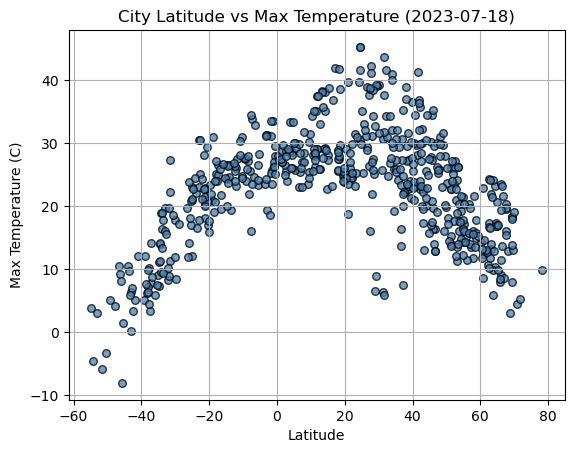

In [11]:
# Build scatter plot for latitude vs. temperature
latvstemp = city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid="True", title="City Latitude vs Max Temperature (" + str(today) +")",
                             xlabel="Latitude", ylabel = "Max Temperature (C)", marker = "o", color ="steelblue", edgecolor="black", s=30, alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

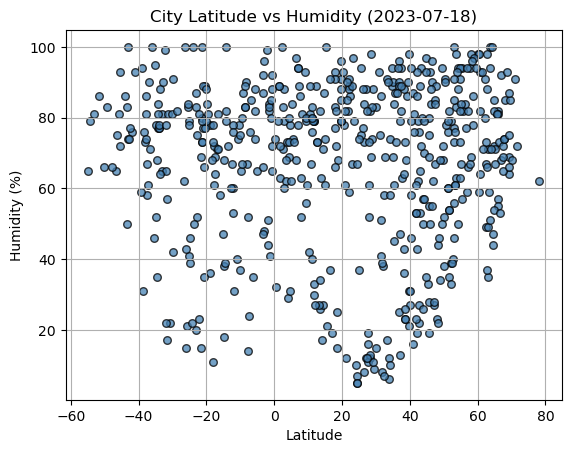

In [12]:
# Build the scatter plots for latitude vs. humidity
latvshumid = city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid="True", title="City Latitude vs Humidity (" + str(today) +")",
                             xlabel="Latitude", ylabel = "Humidity (%)", marker = "o", color ="steelblue", edgecolor="black", s=30, alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

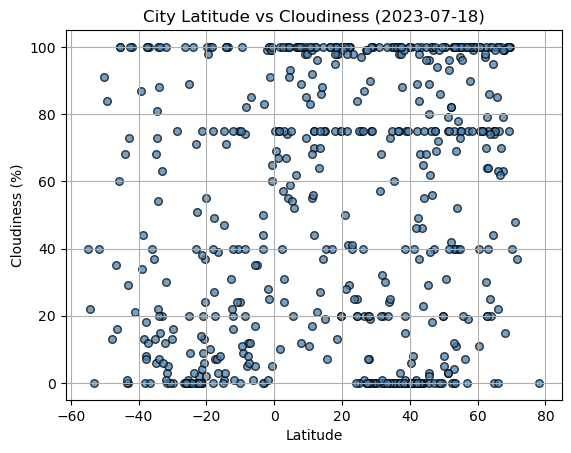

In [14]:
# Build the scatter plots for latitude vs. cloudiness
latvscloud = city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid="True", title="City Latitude vs Cloudiness (" + str(today) +")",
                             xlabel="Latitude", ylabel = "Cloudiness (%)", marker = "o", color ="steelblue", edgecolor="black", s=30, alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

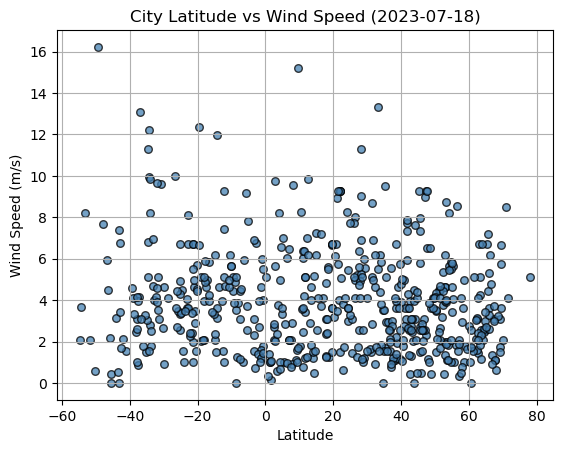

In [15]:
# Build the scatter plots for latitude vs. wind speed
latvswind = city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid="True", title="City Latitude vs Wind Speed (" + str(today) +")",
                             xlabel="Latitude", ylabel = "Wind Speed (m/s)", marker = "o", color ="steelblue", edgecolor="black", s=30, alpha=0.75)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots

def regression(x_values, y_values, x_label, y_label, x_loc=0, y_loc=0):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_loc,y_loc),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r value is: {rvalue}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_condition = city_data_df["Lat"] >= 0
northern_hemi_df = city_data_df.loc[north_condition]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rapid city,44.0805,-103.2310,25.61,70,0,3.09,US,1689691334
2,klyuchi,52.2667,79.1667,23.48,39,82,3.74,RU,1689691055
4,hawaiian paradise park,19.5933,-154.9731,24.73,91,75,3.60,US,1689691052
5,hamilton,39.1834,-84.5333,24.01,86,0,4.63,US,1689691335
6,broadstairs,51.3591,1.4394,22.65,60,75,4.47,GB,1689691335


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_condition = city_data_df["Lat"] < 0
southern_hemi_df = city_data_df.loc[south_condition]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,6.22,76,13,2.45,AU,1689691102
3,adamstown,-25.0660,-130.1015,20.95,79,89,3.31,PN,1689691023
8,flying fish cove,-10.4217,105.6791,24.82,78,75,6.17,CX,1689691335
9,les avirons,-21.2418,55.3394,21.05,73,0,6.69,RE,1689691130
10,waitangi,-43.9535,-176.5597,10.46,86,68,3.13,NZ,1689691036


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.6000952111906713


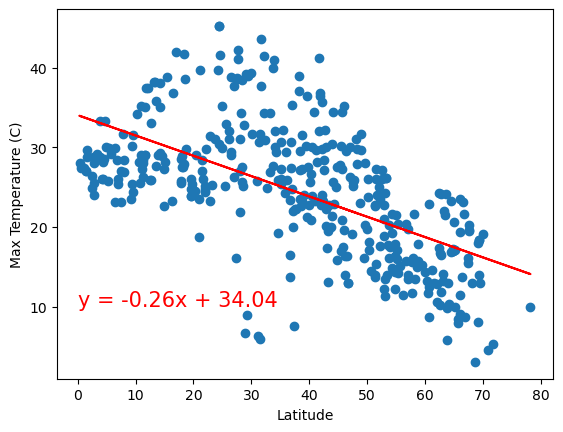

In [19]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (C)", 0,10)

The r value is: 0.8613333969755275


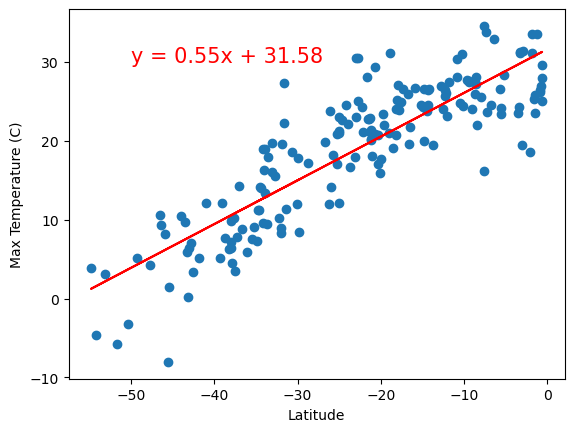

In [22]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (C)", -50,30)

**Discussion about the linear relationship:** There is a fairly strong relationship between Latitude and Max Temperature, with a pearson coefficient of -0.6 in the northern hemisphere and 0.86 in the southern hemisphere. This makes sense as temperatures get cooler as we move away from the equator (ie where latitude is 0). From this specific sample, it can be observed that the strength of the relationship between latitude and temperature is stronger in southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.07856633399065474


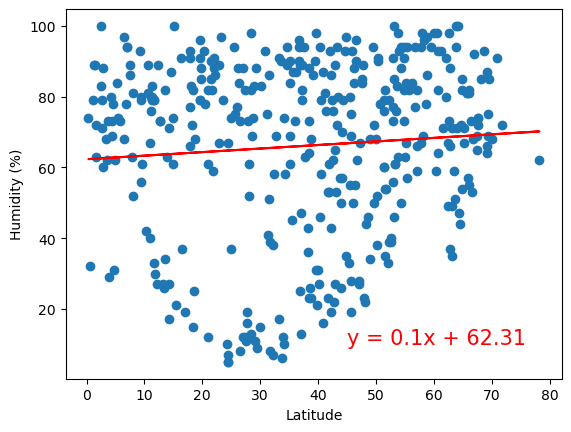

In [20]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", 45,10)


The r value is: -0.08198603044898277


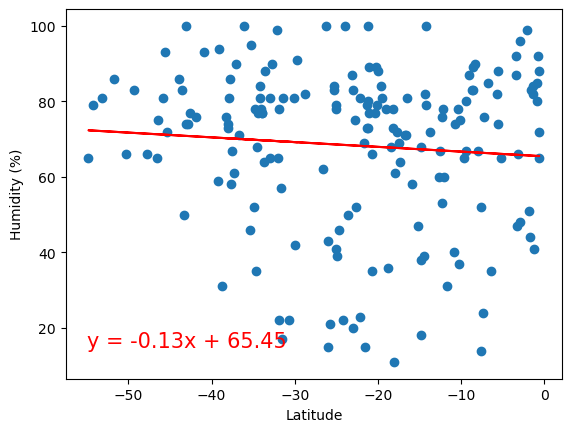

In [21]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", -55,15)


**Discussion about the linear relationship:** The relationship between Latitude and Humidity is very week, with a pearson coefficient of 0.08 in the northern hemisphere and -0.08 in the southern hemisphere. We can conclude that there is no significant relationship between latitude and humidity. This makes sense as humidity is impacted more by other factors such as air temperature, warm bodies of water, and air movement

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.025448348740854013


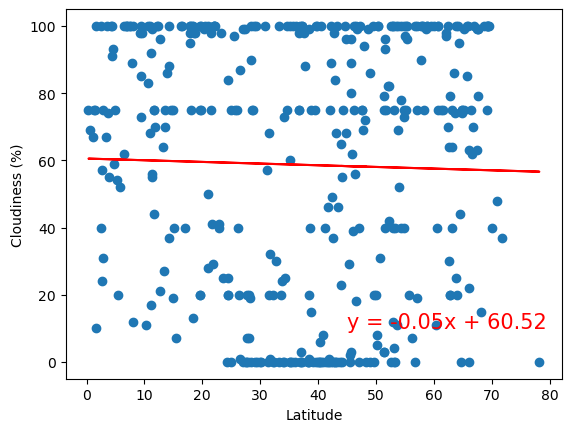

In [23]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", 45,10)


The r value is: 0.025578401374616283


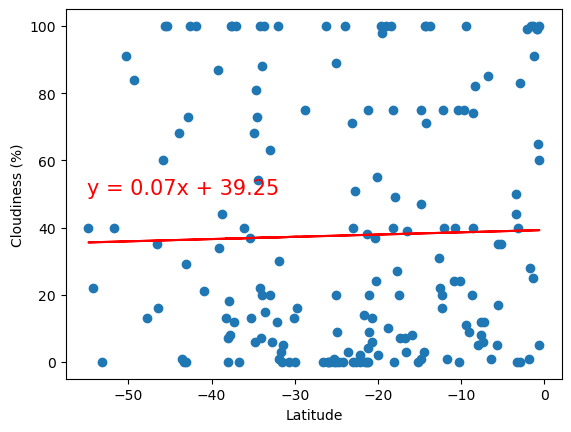

In [24]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", -55,50)


**Discussion about the linear relationship:** The relationship between Latitude and Cloudiness is very week, with a pearson coefficient of -0.02 in the northern hemisphere and 0.02 in the southern hemisphere. We can conclude that there is no significant relationship between latitude and clousiness. This makes sense as cloudiness is impacted more by other factors such as prevailing wind properties, weather system, and sea surface heat situation etc.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.0947364329831218


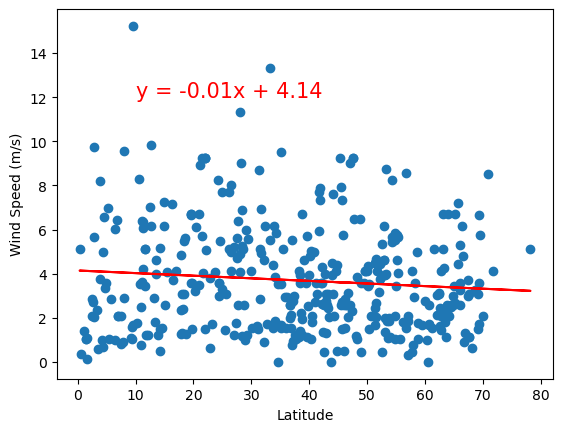

In [25]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", 10,12)


The r value is: -0.07191474149714612


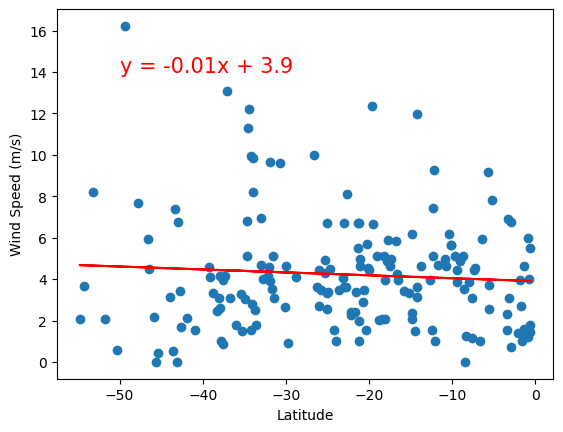

In [26]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", -50,14)


**Discussion about the linear relationship:** The relationship between Latitude and Wind Speed is very week, with a pearson coefficient of -0.09 in the northern hemisphere and -0.07 in the southern hemisphere. We can conclude that there is no significant relationship between latitude and wind speed. This makes sense as wind speed is impacted more by other factors such as prevailing temperature, air pressure, centripetal acceleration etc.
